In [1]:
#import rpy2
import pandas as pd
from pandas import Series
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6




       Month  NPassengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]

 Data Types:
Month          object
NPassengers     int64
dtype: object


Text(0.5, 1.0, 'AirPassengers')

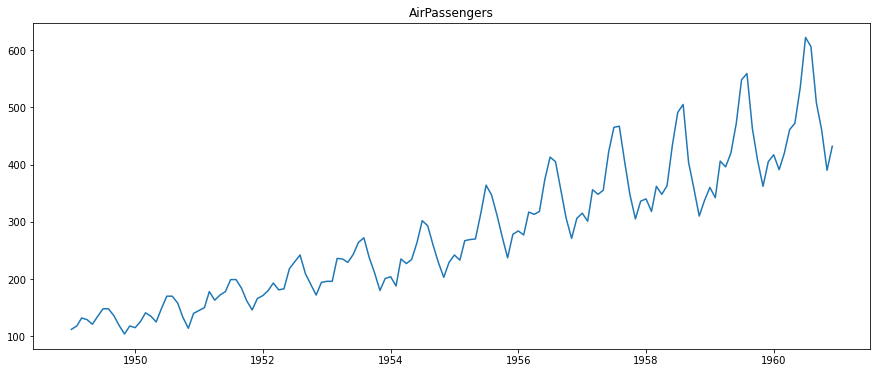

In [2]:

data = pd.read_csv('AirPassengers.csv')
print(data)
print('\n Data Types:')
print(data.dtypes)


######Convertir el conjunto de datos en una serie de Tiempo#####


con=data['Month']
data['Month']=pd.to_datetime(data['Month'])
##data.set_index('Month', inplace=True)
pasajeros=data.set_index('Month')
#check datatype of index

#convert to time series:
ts = pasajeros['NPassengers']
ts.head(10)

####Graficar la Serie#####
plt.plot(ts)
plt.title('AirPassengers') 




In [3]:
ts.index
#type(pasajeros)

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [4]:
#Ojo que no hay freq
pasajeros.index.freq='MS'

ts.index.freq='MS'


In [5]:
ts.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

(array([ 6.82749005,  6.93282224,  7.16189151,  7.11461078,  6.98378687,
        7.20826542,  7.39959794,  7.39959794,  7.22352834,  6.94993188,
        6.67930112,  6.93282224,  6.88074148,  7.0663838 ,  7.29843847,
        7.20826542,  7.05009066,  7.41371485,  7.69297755,  7.69297755,
        7.53726005,  7.17744836,  6.86312389,  7.28363955,  7.35675408,
        7.42775127,  7.791663  ,  7.6033268 ,  7.71801394,  7.791663  ,
        8.03379957,  8.03379957,  7.86322651,  7.59025293,  7.3711186 ,
        7.64214252,  7.70552693,  7.81574285,  7.96693012,  7.82769741,
        7.85143867,  8.23478523,  8.35415797,  8.46833738,  8.14152446,
        7.94424651,  7.71801394,  7.97819691,  8.00058286,  8.00058286,
        8.41186604,  8.40233549,  8.34441554,  8.47763304,  8.66568618,
        8.73398286,  8.42136224,  8.16254066,  7.81574285,  8.05570781,
        8.08822445,  7.90983871,  8.40233549,  8.32482145,  8.39277032,
        8.66568618,  8.97573698,  8.90544371,  8.62209995,  8.3

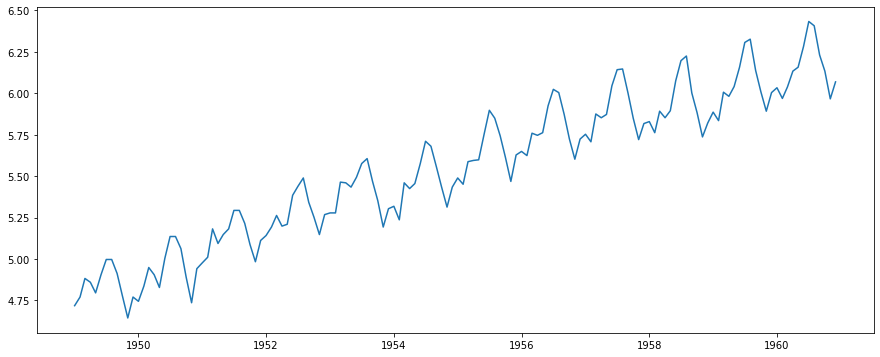

In [6]:
#####Transformación Box-Cox
import scipy.stats ####En ocasiones puede funcionar la línea 46 sin ésta línea.
print(sp.stats.boxcox(ts,alpha=0.05))
sp.stats.boxcox(data['NPassengers'],alpha=0.05)
logAirp=sp.stats.boxcox(data['NPassengers'],lmbda=0)
data = data.assign(logAirp=logAirp)   

logpasajeros=data.set_index('Month')   
logAirPass=  logpasajeros['logAirp'] 
plt.plot(logAirPass)

In [7]:
logAirPass.index.freq='MS'
logAirPass.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

# Descomposicón Usando Filtros(de Promedios Móviles u otros)

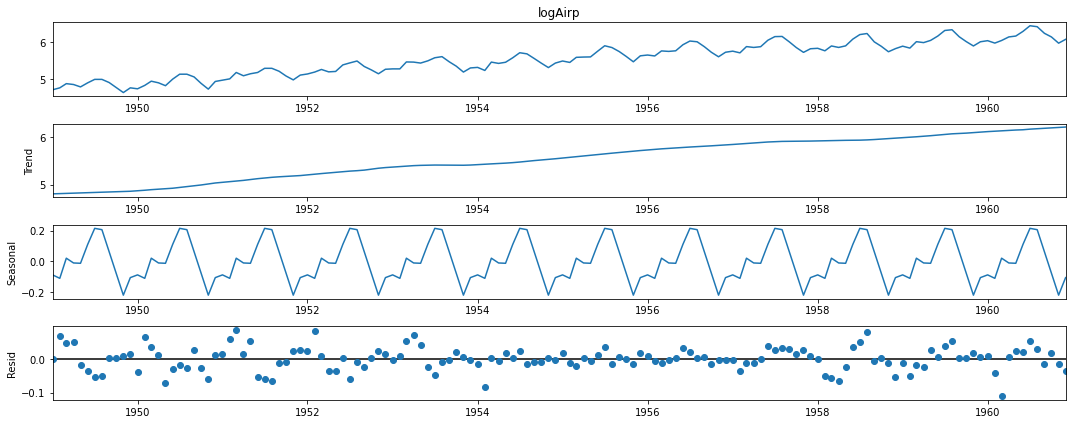

In [8]:

####Descomposición usando filtros
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

###También se puede hacer vía STL###
result = seasonal_decompose(logAirPass, model='additive',extrapolate_trend=6)  
#extrapolate es para que en los extremos no haya NA, vemos que el q = 6 porque el ciclo es anual. Así, q =12/2

result.plot()
pyplot.show()



In [9]:
#print(result.trend.values)
#print(result.seasonal.values)
print(result.resid.values)
#print(result.observed)

[-4.99142849e-05  6.93119027e-02  4.59139398e-02  4.87127998e-02
 -1.84032508e-02 -3.67283486e-02 -5.47147404e-02 -4.98604988e-02
  3.57537159e-03  2.66220197e-03  8.21610791e-03  1.53556292e-02
 -3.80004461e-02  6.40926952e-02  3.41496338e-02  1.06871382e-02
 -7.27116649e-02 -3.07208372e-02 -1.93313467e-02 -2.75656244e-02
  2.57316551e-02 -2.68159742e-02 -5.85830956e-02  1.24640385e-02
  1.58648650e-02  5.89330940e-02  8.67719386e-02  1.50769493e-02
  5.23158718e-02 -5.34946370e-02 -5.96241601e-02 -6.54041199e-02
 -1.12663013e-02 -9.08054763e-03  2.35181996e-02  2.71823092e-02
  2.46616521e-02  8.40635151e-02  9.93809643e-03 -3.55203534e-02
 -3.61994839e-02  2.79298179e-03 -5.94838319e-02 -9.17027191e-03
 -2.42281616e-02  3.71216427e-03  2.22472643e-02  1.50564295e-02
 -2.67308638e-03  9.00520101e-03  5.42153054e-02  7.14855970e-02
  4.16004122e-02 -2.51245463e-02 -4.90617218e-02 -1.04504378e-02
 -2.80434469e-03  1.98744594e-02  5.05225799e-03 -2.64105777e-03
 -1.46007130e-02 -8.26885

In [10]:
help(seasonal_decompose)
#from statsmodels.tsa.seasonal import STL
#help(STL)

Help on function seasonal_decompose in module statsmodels.tsa.seasonal:

seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
    Seasonal decomposition using moving averages.
    
    Parameters
    ----------
    x : array_like
        Time series. If 2d, individual series are in columns. x must contain 2
        complete cycles.
    model : {"additive", "multiplicative"}, optional
        Type of seasonal component. Abbreviations are accepted.
    filt : array_like, optional
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by
        two_sided.
    period : int, optional
        Period of the series. Must be used if x is not a pandas object or if
        the index of x does not have  a frequency. Overrides default
        periodicity of x if x is a pandas object with a timeseries index.
    two_sided : bool, optional
        The moving a

# Descomposición Usando Suavizamiento Exponencial

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Freq: MS, Name: logAirp, Length: 144, dtype: float64


C:\Users\sanch\anaconda3\envs\series\lib\site-packages\statsmodels\tsa\holtwinters\results.py:169: FutureWarning: slope is deprecated and will be removed after 0.13
  warnings.warn(


Text(0, 0.5, 'resid')

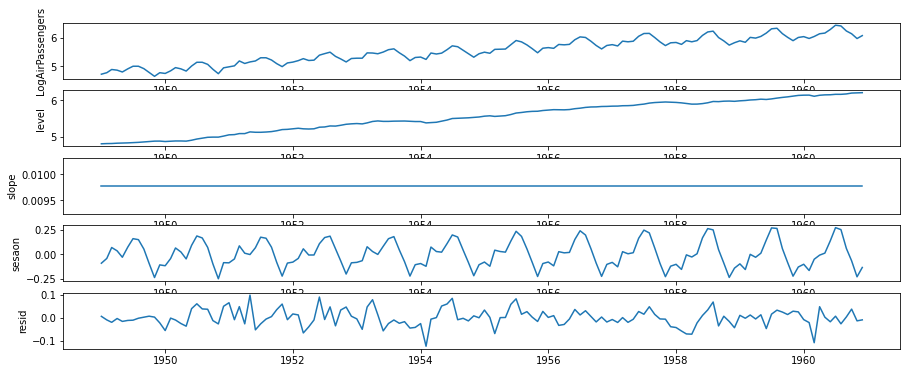

In [13]:
####Holt-Winters
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt  #suavizamiento exponencial
print(logAirPass)
#print(pd.infer_freq(data['Month'], warn=True))
fit1 = ExponentialSmoothing(logAirPass, seasonal_periods=12, trend='add', seasonal='add', initialization_method="estimated",use_boxcox=False).fit()  
#metemos la serie, hacemos explicita la frecuencia de cada cuanto observa

####ejecutar desde la línea 74 hasta la 88
plt.subplot(5, 1, 1)
plt.plot(logAirPass)
plt.ylabel('LogAirPassengers') 
plt.subplot(5, 1, 2)
plt.plot(fit1.level)
plt.ylabel('level') 
plt.subplot(5, 1, 3)
plt.plot(fit1.slope)
plt.ylabel('slope') 
plt.subplot(5, 1, 4)
plt.plot(fit1.season)
plt.ylabel('sesaon') 
plt.subplot(5, 1, 5)
plt.plot(fit1.resid)
plt.ylabel('resid') 

# Parámeros estimados

In [14]:
fit1.params_formatted


,name,param,optimized
smoothing_level,alpha,3.778210e-01,True
smoothing_trend,beta,7.739714e-18,True
smoothing_seasonal,gamma,4.578104e-01,True
initial_level,l.0,4.797178e+00,True
initial_trend,b.0,9.780260e-03,True
initial_seasons.0,s.0,-9.398700e-02,True
initial_seasons.1,s.1,-3.817590e-02,True
initial_seasons.2,s.2,7.839888e-02,True
initial_seasons.3,s.3,3.682365e-02,True
initial_seasons.4,s.4,-2.293855e-02,True


<AxesSubplot:xlabel='Month'>

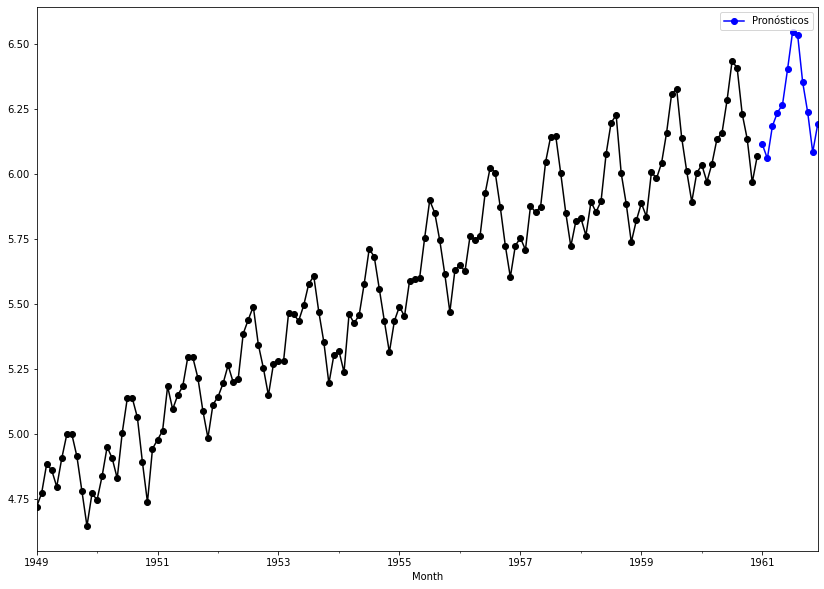

In [15]:
fcast1 = fit1.forecast(12).rename("Pronósticos")
ax = logAirPass.plot(color="black", marker="o", figsize=(14,10))
fcast1.plot(ax=ax, color='blue', marker="o", legend=True)